In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import spectral_clustering

In [2]:
cc_info_raw = pd.read_csv('cc_info.csv')

In [3]:
cc_info_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc_info_raw.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1424,C11472,8625.355309,1.000000,1945.95,0.00,1945.95,8004.403258,0.833333,0.000000,0.833333,0.500000,15,50,12000.0,3732.923009,3577.000998,0.00,12
2220,C12289,1928.971964,1.000000,2061.55,369.55,1692.00,0.000000,1.000000,1.000000,1.000000,0.000000,0,30,8500.0,2200.938680,450.459621,0.00,12
1243,C11287,395.819070,0.888889,37.00,0.00,37.00,0.000000,0.111111,0.000000,0.111111,0.000000,0,2,2500.0,243.495592,159.297420,0.00,9
6832,C17020,931.827906,0.545455,0.00,0.00,0.00,2937.591809,0.000000,0.000000,0.000000,0.090909,1,0,3500.0,2995.213811,244.405201,0.25,11
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.00,12


In [6]:
cc_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
cc_info_raw.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
cc_info_raw.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [15]:
cc_info_raw[np.isnan(cc_info_raw['MINIMUM_PAYMENTS'].values)].sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5321,C15473,0.000000,0.000000,54.85,0.00,54.85,0.000000,0.333333,0.000000,0.333333,0.000000,0,5,5000.0,75.750562,NaN,0.0,12
7664,C17870,0.570113,0.090909,29.00,29.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,319.172687,NaN,0.0,12
5763,C15924,0.000000,0.000000,1021.56,0.00,1021.56,0.000000,1.000000,0.000000,1.000000,0.000000,0,36,3000.0,0.000000,NaN,0.0,12
1651,C11705,10.703306,0.090909,0.00,0.00,0.00,575.193978,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,0.000000,NaN,0.0,12
8929,C19170,371.527312,0.333333,0.00,0.00,0.00,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
517,C10540,675.117139,0.181818,0.00,0.00,0.00,6523.780195,0.000000,0.000000,0.000000,0.083333,1,0,12500.0,0.000000,NaN,0.0,12
867,C10898,1254.970145,1.000000,769.34,769.34,0.00,2234.780695,0.166667,0.166667,0.000000,0.333333,7,3,7000.0,0.000000,NaN,0.0,12
860,C10891,0.000000,0.000000,199.88,0.00,199.88,0.000000,0.750000,0.000000,0.750000,0.000000,0,14,4000.0,0.000000,NaN,0.0,12
2307,C12378,0.000000,0.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
3844,C13952,1.025109,0.090909,59.66,0.00,59.66,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1700.0,0.000000,NaN,0.0,12


In [18]:
cc_info_raw.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

CREDIT_LIMIT and MINIMUM_PAYMENTS have null values

In [19]:
cc_info_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
cc_info_raw.columns[1:]

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
cc_info_raw.drop('CUST_ID',axis=1,inplace=True)

In [26]:
cc_info_raw.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5B5178A58>,
      dtype=object)

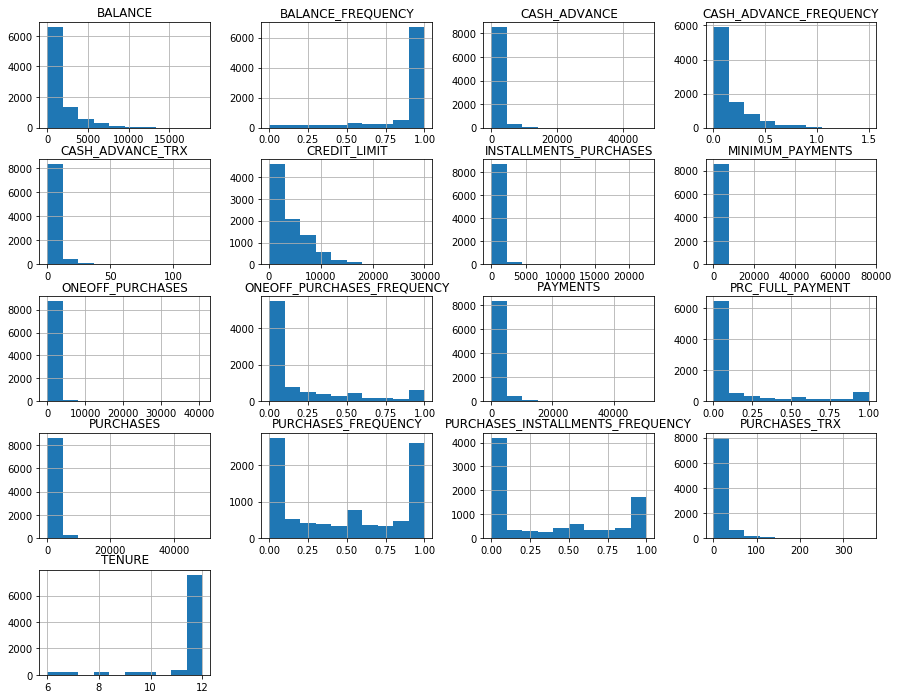

In [32]:
cc_info_raw.hist(figsize=(15,12))

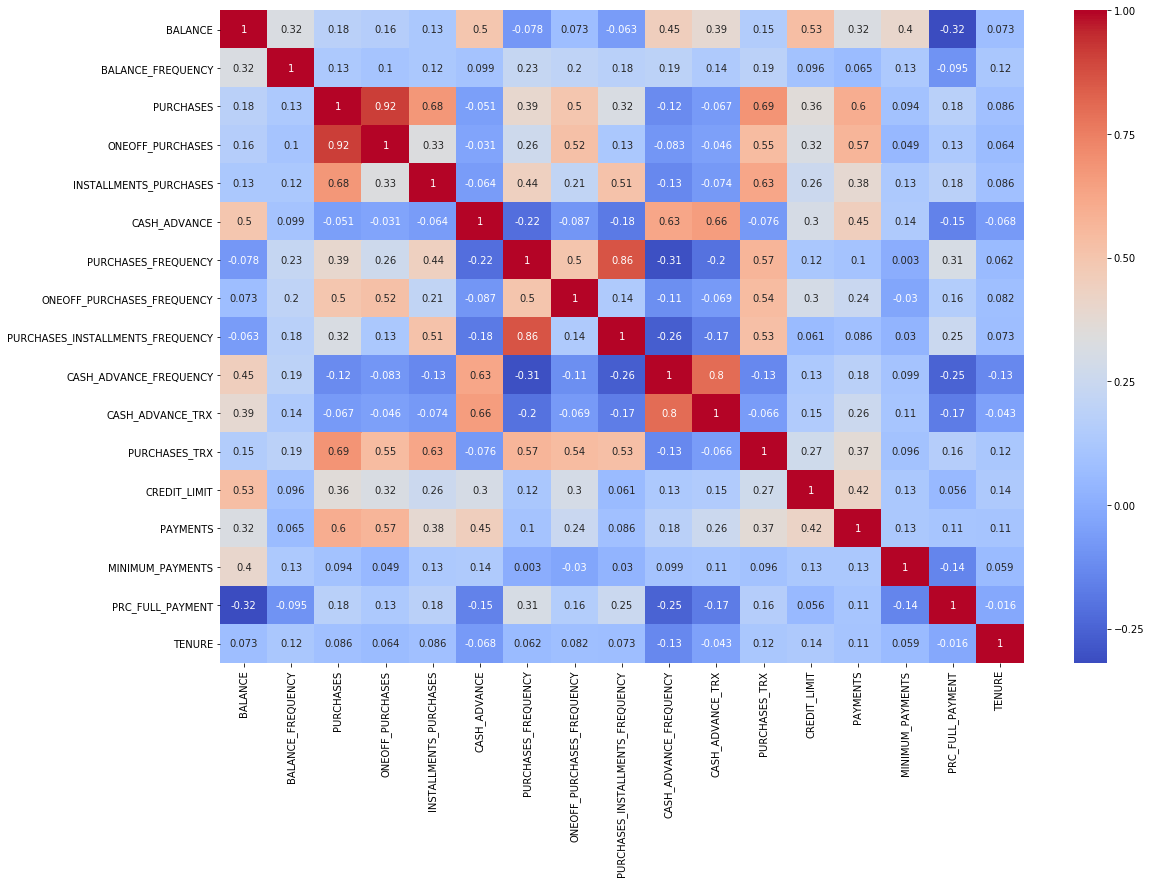

In [40]:
plt.figure(figsize=(18,12))
sns.heatmap(cc_info_raw.corr(),cmap='coolwarm',annot=True)

In [42]:
cc_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

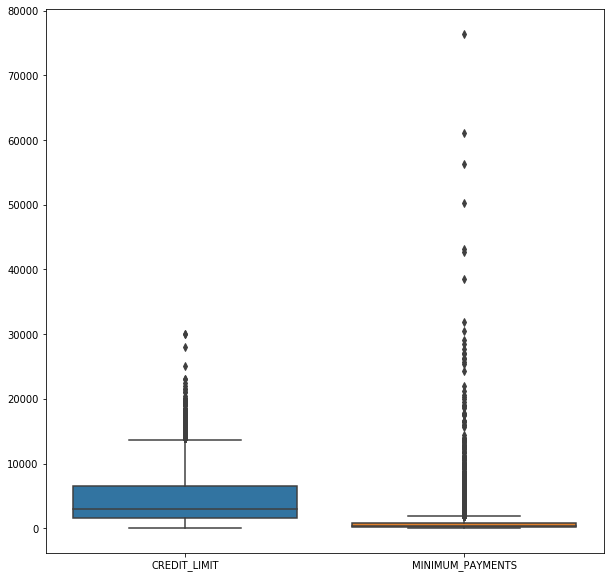

In [62]:
#look at box-plots of features with missing data
plt.figure(figsize=(10,10))
sns.boxplot(data=cc_info_raw[['CREDIT_LIMIT','MINIMUM_PAYMENTS']])

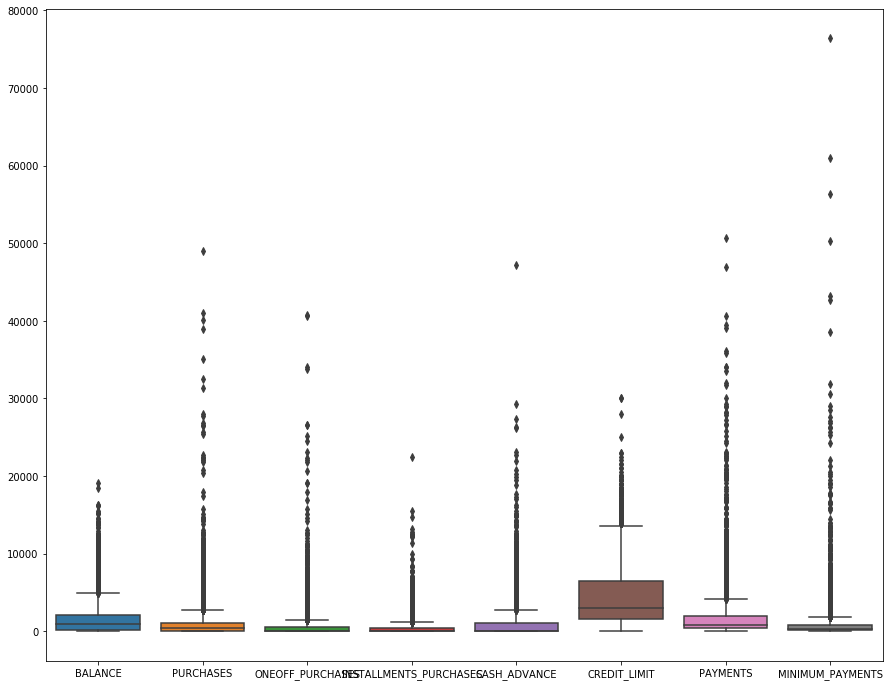

In [46]:
#look at box-plots of numeric
plt.figure(figsize=(15,12))
sns.boxplot(data=cc_info_raw[['BALANCE',
             'PURCHASES',
             'ONEOFF_PURCHASES',
             'INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE',
             'CREDIT_LIMIT',
             'PAYMENTS',
             'MINIMUM_PAYMENTS']])

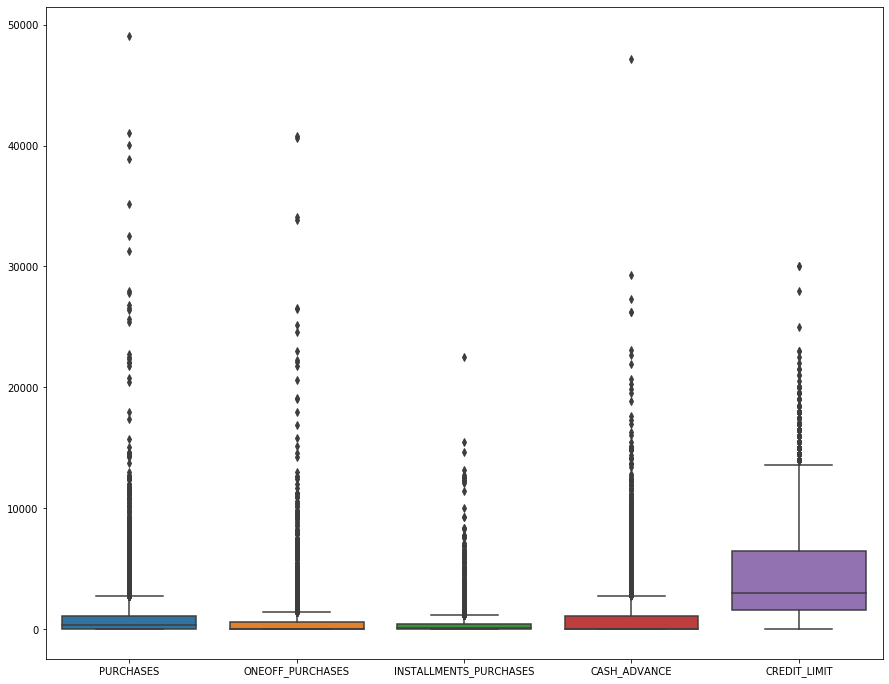

In [231]:
#look at box-plots of numeric
plt.figure(figsize=(15,12))
sns.boxplot(data=cc_info_raw[['PURCHASES',
             'ONEOFF_PURCHASES',
             'INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE',
             'CREDIT_LIMIT']])

many outliers in these features

In [47]:
cc_info_raw.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

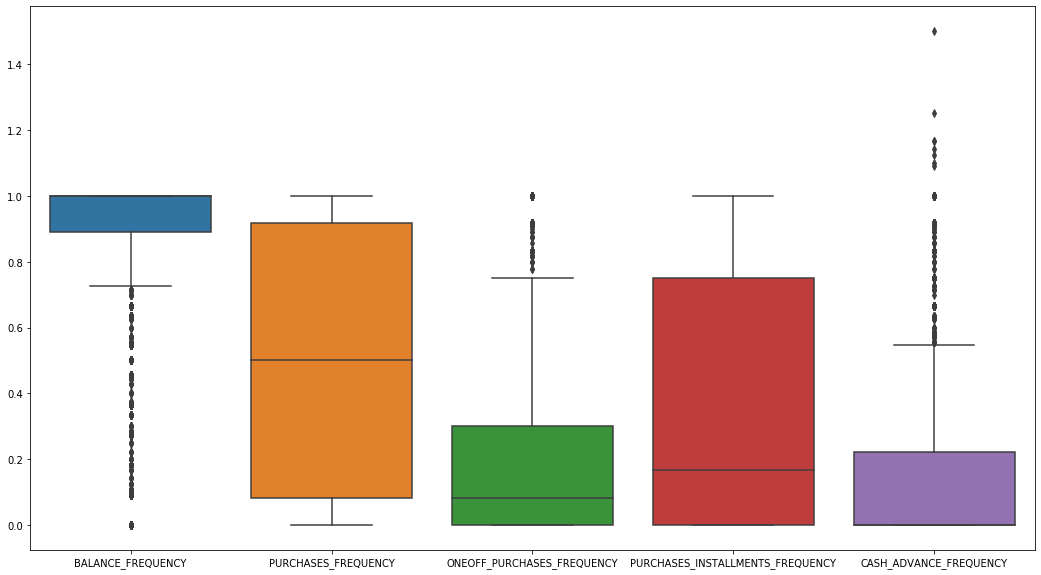

In [51]:
#look at boxplot of frequency
plt.figure(figsize=(18,10))
sns.boxplot(data=cc_info_raw[['BALANCE_FREQUENCY',
                              'PURCHASES_FREQUENCY',
                              'ONEOFF_PURCHASES_FREQUENCY',
                              'PURCHASES_INSTALLMENTS_FREQUENCY',
                              'CASH_ADVANCE_FREQUENCY']])

In [52]:
#cash_advance_frequency as values >1, these should be removed

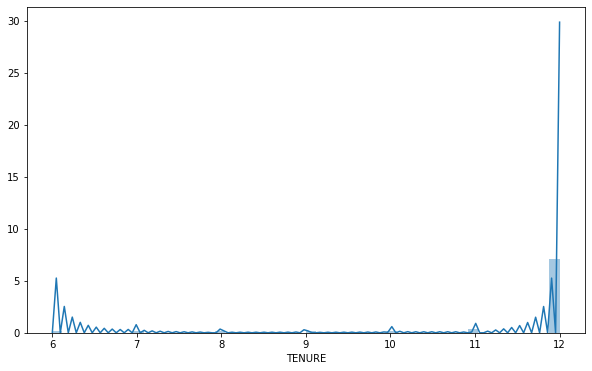

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(cc_info_raw['TENURE'])

In [72]:
cc_info_clean = cc_info_raw.copy()

In [73]:
cc_info_clean[np.isnan(cc_info_clean['CREDIT_LIMIT'])] = cc_info_clean['CREDIT_LIMIT'].median()

In [74]:
cc_info_clean[np.isnan(cc_info_clean['MINIMUM_PAYMENTS'])] = cc_info_clean['MINIMUM_PAYMENTS'].median()

In [75]:
cc_info_clean.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [79]:
len(cc_info_clean[cc_info_clean['CASH_ADVANCE_FREQUENCY']>1])/len(cc_info_clean)

0.03597765363128492

In [95]:
cc_info_clean.drop(cc_info_clean[cc_info_clean['CASH_ADVANCE_FREQUENCY']>1].index.values,inplace=True)

In [96]:
np.sum(cc_info_clean['CASH_ADVANCE_FREQUENCY']>1)

0

In [97]:
cc_info_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0


In [188]:
cc_info_proc = cc_info_clean.copy()

In [189]:
cc_info_proc[cc_info_proc.columns[:-1]] = StandardScaler().fit_transform(cc_info_proc[cc_info_proc.columns[:-1]])

In [190]:
cc_info_proc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.743914,-0.369540,-0.429394,-0.359259,-0.355121,-0.467783,-0.821532,-0.686228,-0.717991,-0.685662,-0.478448,-0.517934,-0.962067,-0.543917,-0.305321,-0.538048,12.0
1,0.766201,0.068030,-0.473402,-0.359259,-0.459097,2.571463,-1.236880,-0.686228,-0.927320,0.568972,0.101558,-0.597339,0.677867,0.796477,0.087703,0.211812,12.0
2,0.428351,0.505601,-0.116744,0.099615,-0.459097,-0.467783,1.255201,2.645562,-0.927320,-0.685662,-0.478448,-0.120911,0.814529,-0.399522,-0.099809,-0.538048,12.0
4,-0.372871,0.505601,-0.466021,-0.349763,-0.459097,-0.467783,-1.029207,-0.408580,-0.927320,-0.685662,-0.478448,-0.557637,-0.907402,-0.380189,-0.260963,-0.538048,12.0
5,0.101010,0.505601,0.141632,-0.359259,0.994026,-0.467783,0.424508,-0.686228,0.537988,-0.685662,-0.478448,-0.279720,-0.743409,-0.132218,0.650131,-0.538048,12.0


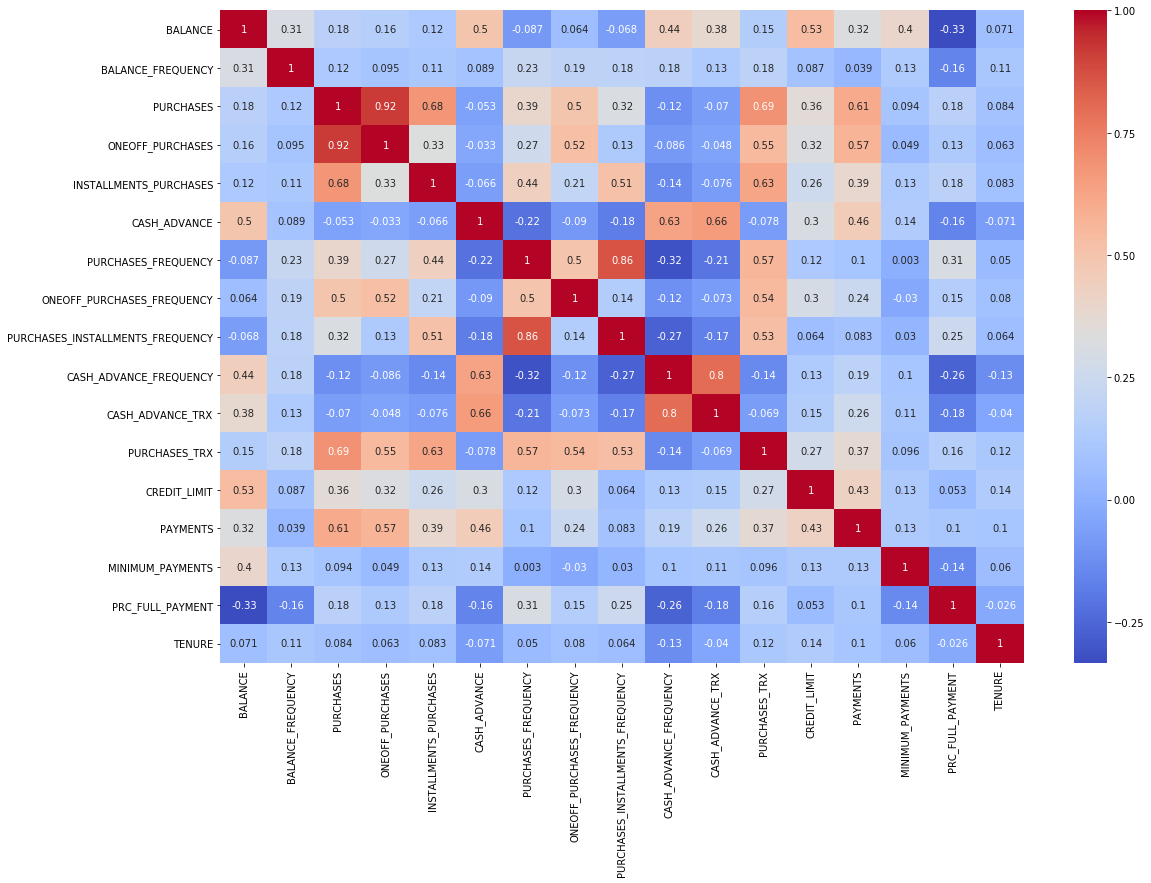

In [191]:
plt.figure(figsize=(18,12))
sns.heatmap(cc_info_proc.corr(),cmap='coolwarm',annot=True)

In [236]:
pca = PCA(0.95)

In [237]:
pca.fit(cc_info_proc)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [238]:
pca.explained_variance_ratio_

array([0.26280531, 0.19567367, 0.0989376 , 0.08524371, 0.0660172 ,
       0.060063  , 0.0484156 , 0.04067536, 0.03554147, 0.02952904,
       0.02270418, 0.01705709])

In [239]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26280531, 0.45847898, 0.55741658, 0.64266029, 0.70867749,
       0.76874049, 0.81715609, 0.85783145, 0.89337292, 0.92290196,
       0.94560614, 0.96266322])

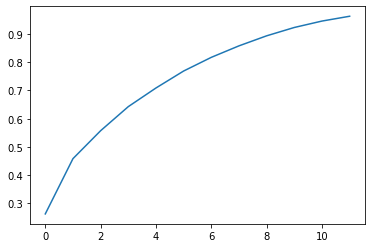

In [240]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [241]:
cc_info_proc_pca = pca.fit_transform(cc_info_proc)

In [242]:
cc_info_proc_pca = pd.DataFrame(cc_info_proc_pca)

In [245]:
cc_info_proc_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.662295,-1.115017,-0.684733,0.666585,0.345834,0.101844,0.764523,-0.167024,0.020336,-0.092846,-0.226651,-0.050635
1,-1.175644,2.450109,-0.416931,0.777013,-0.797904,0.580876,-0.645122,-0.121475,0.791695,-0.739614,-0.879495,-0.595317
2,0.964673,-0.389509,-0.757823,0.204681,1.133958,-1.936910,-1.743977,0.181518,-0.857519,-0.032877,-0.747362,0.690419
3,-1.577158,-0.717821,-0.872363,0.505206,0.736380,-0.367076,0.618805,-0.030343,0.610808,-0.086803,-0.474092,-0.117366
4,0.251913,-0.782030,-0.791024,-1.009459,0.578642,0.908247,0.835378,-0.156246,0.389536,-0.196024,-0.199051,0.329535


In [246]:
tsne = TSNE(n_components=2)

In [247]:
cc_info_proc_tsne = pd.DataFrame(tsne.fit_transform(cc_info_proc_pca))

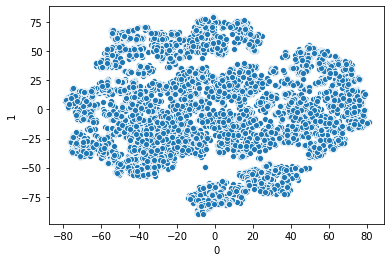

In [265]:
sns.scatterplot(x=cc_info_proc_tsne.iloc[:,0],y=cc_info_proc_tsne.iloc[:,1])

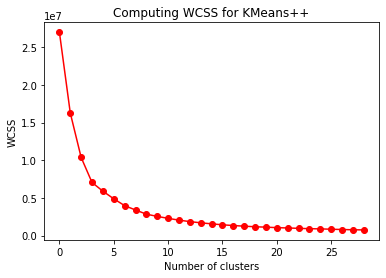

In [251]:
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( cc_info_proc_tsne.values )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [295]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
kmeans.fit_predict( cc_info_proc_tsne.values )

array([1, 0, 2, ..., 2, 2, 2])

In [296]:
cc_info_proc_tsne_kmeans = cc_info_proc_tsne.copy()

In [297]:
cc_info_proc_tsne_kmeans['cluster'] = kmeans.fit_predict( cc_info_proc_tsne.values )

In [298]:
cc_info_proc_tsne_kmeans['cluster']

0       0
1       1
2       2
3       0
4       0
5       2
6       0
7       1
8       0
9       0
10      0
11      2
12      2
13      1
14      1
15      2
16      0
17      0
18      1
19      1
20      2
21      0
22      2
23      1
24      0
25      1
26      0
27      1
28      0
29      1
       ..
8598    2
8599    2
8600    2
8601    2
8602    2
8603    2
8604    2
8605    2
8606    2
8607    2
8608    2
8609    2
8610    2
8611    2
8612    2
8613    2
8614    2
8615    2
8616    2
8617    2
8618    2
8619    2
8620    2
8621    2
8622    2
8623    2
8624    2
8625    2
8626    2
8627    2
Name: cluster, Length: 8628, dtype: int32

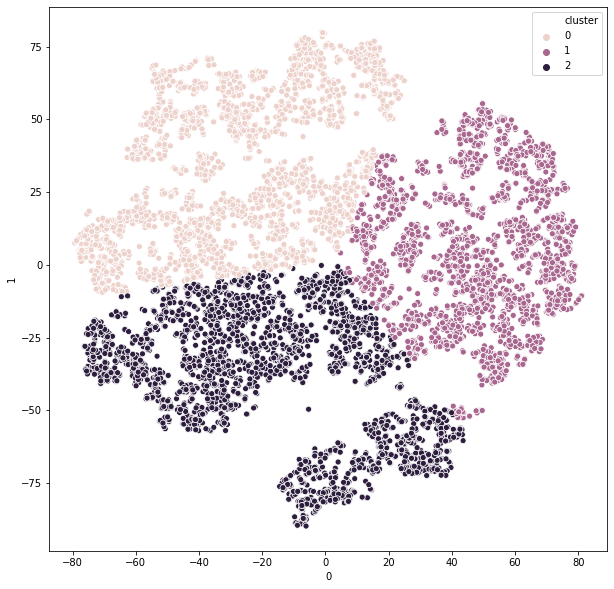

In [299]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=0,
                y=1,
                data=cc_info_proc_tsne_kmeans,
                hue='cluster')

In [279]:
gm = GaussianMixture(n_components=4)

In [280]:
cc_info_proc_tsne_gmm = cc_info_proc_tsne.copy()
cc_info_proc_tsne_gmm['cluster'] = gm.fit_predict(cc_info_proc_tsne.values)

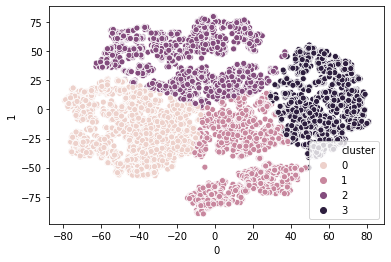

In [281]:
sns.scatterplot(x=0,
                y=1,
                data=cc_info_proc_tsne_gmm,
                hue='cluster')

In [301]:
sc = spectral_clustering(n_clusters = 4,affinity=)

TypeError: spectral_clustering() missing 1 required positional argument: 'affinity'